# Trapezoidal Rule


## Non-composite trapezoidal rule

We will be considering a definite integral $$\displaystyle\int_a^b f(x)\,dx$$ with a function $f(x)$ defined on the interval $[a,b]$ and having enough smoothness (continuous derivatives) as needed for various error estimates.

The basic idea is to replace the function $f(x)$ on the interval $[a,b]$ by a linear function (whose graph is the secant line connecting the points $(a,f(a))$ and $(b,f(b))$) and approximate the integral of $f(x)$ by the integral of the linear function.

Below is an example with $f(x)=e^{-x^2}$ on the interval $[0,2]$. The integral of $f(x)$ over $[0,2]$ (which turns out to be about $0.88208139$) will be approximated by the area of the red trapezoid, which is easy to compute:
\begin{equation*}
  \int_0^2 e^{-x^2}\,dx
  \approx
  \frac{f(0)+f(2)}{2}(2-0)
  =
  1+e^{-4}
  \approx
  1.01831563.
\end{equation*}
The visual representation below confirms that the trapezoidal rule will produce an overestimate of the actual value.

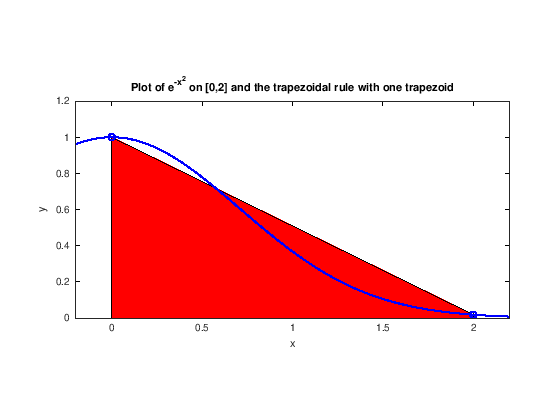

In [2]:
f = inline("exp(-x.^2)");
x_all = -0.2:0.01:2.2;
x_int = 0:2:2;
fill([x_int, fliplr(x_int)], [f(x_int), 0, 0], "r")
hold on
plot(x_all, f(x_all), "b", "linewidth", 4, x_int, f(x_int), "bo", "linewidth", 4)
axis equal;
axis([min(x_all), max(x_all), 0, 1.2]);
xlabel("x"); ylabel("y");
title("Plot of e^{-x^2} on [0,2] and the trapezoidal rule with one trapezoid")

Using Taylor series, one can show that if $f''$ is continuous, then
\begin{equation*}
  \int_a^b f(x)\,dx
  =
  \frac{f(a)+f(b)}{2}\,(b-a)
  -
  \frac{1}{12}(b-a)^3f''(\xi)
  \qquad
  \text{for some }
  \xi\in(a,b).
\end{equation*}
The first term in the right-hand side is the area of the corresponding trapezoid, while the second term can be viewed as the error of the trapezoidal approximation, so we see that the error of the trapezoidal approximation is given by
\begin{equation*}
  -\frac{1}{12}(b-a)^3f''(\xi)
  \qquad
  \text{for some }
  \xi\in(a,b).
\end{equation*}

Applying this to our example with $f(x)=e^{-x^2}$ on the interval $[0,2]$, we have $f''(x)=(4x^2-2)e^{-x^2}$ and its absolute value plotted on the interval $[0,2]$ is given below. We see that on this interval the maximum value of $\vert f''\vert$ is $2$ and thus our approximation has to have an error that is at most
\begin{equation*}
  \frac{1}{12}(b-a)^3\max_{x\in[a,b]}\vert f''(x)\vert
  =
  \frac{1}{12}(2-0)^3\times2
  =
  \frac{4}{3}.
\end{equation*}
We easily verify that our error $\vert0.88208139-1.01831563\vert$ is definitely smaller than $4/3$.

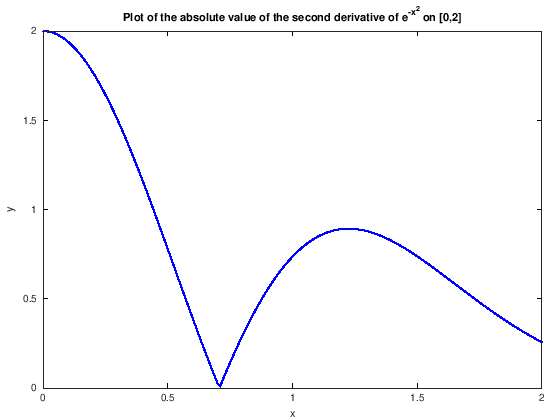

In [3]:
ddf = inline("(4*x.^2-2).*exp(-x.^2)");
x = 0:0.01:2;
plot(x, abs(ddf(x)), "b-", "linewidth", 4)
xlabel("x"); ylabel("y");
title("Plot of the absolute value of the second derivative of e^{-x^2} on [0,2]")

## Composite trapezoidal rule

In practice, we do not use the trapezoidal rule with just one trapezoid. Instead, the interval $[a,b]$ is divided into a partition $a=x_0<x_1<x_2<\cdots<x_n=b$ and the integral of $f(x)$ over the interval $[a,b]$ is approximated by the sum of the areas of the trapezoids formed on each subinterval $[x_{i-1},x_i]$:
\begin{equation*}
  \int_a^b f(x)\,dx
  \approx
  \sum_{i=1}^n\frac{f(x_{i-1})+f(x_i)}{2}(x_i-x_{i-1}).
\end{equation*}
Below is an example showing a partition of $[0,2]$ into four subintervals (of equal length $0.5$) and the depiction of the trapezoidal rule (colored red). The computed approximation is $0.88061863$; notice that in this case the error of the approximation is $$\vert0.88208139-0.88061863\vert\approx1.46\times10^{-3}.$$

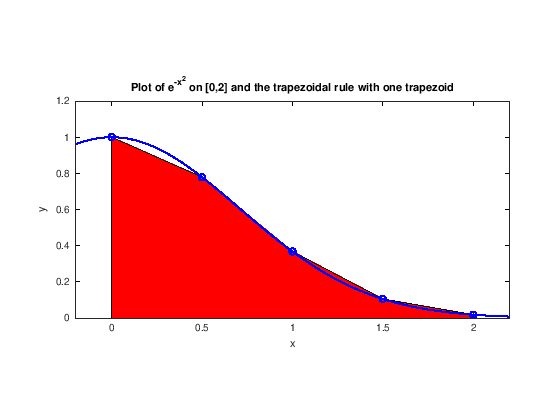

In [4]:
f = inline("exp(-x.^2)");
x_all = -0.2:0.01:2.2;
x_int = 0:0.5:2;
fill([x_int, fliplr(x_int)], [f(x_int), zeros(1,length(x_int))], "r")
hold on
plot(x_all, f(x_all), "b", "linewidth", 4, x_int, f(x_int), "bo", "linewidth", 4)
axis equal;
axis([min(x_all), max(x_all), 0, 1.2]);
xlabel("x"); ylabel("y");
title("Plot of e^{-x^2} on [0,2] and the trapezoidal rule with one trapezoid")

## Composite trapezoidal rule with uniform spacing

For simplicity of implementation of the trapezoidal rule, uniform spacing is often used in which $x_i-x_{i-1}=\dfrac{b-a}{n}$, a quantity denoted by $h$. In this case the expression for the trapezoidal rule simplifies and becomes
\begin{align*}
  \int_a^b f(x)\,dx
  &\approx
  \sum_{i=1}^n\frac{f(x_{i-1})+f(x_i)}{2}(x_i-x_{i-1})\\
  &=
  \frac{h}{2}\sum_{i=1}^n\left(f(x_{i-1})+f(x_i)\right)\\
  &=
  \frac{h}{2}\left(f(x_0)+2f(x_1)+2f(x_2)+\dots+2f(x_{n-1})+f(x_n)\right),
\end{align*}
which is often denoted by $T_n$ (trapezoidal rule with $n$ equal subintervals).

If $f''$ is continuous, then the error of the approximation can be shown to satisfy
\begin{equation*}
  \int_a^b f(x)\,dx
  =
  T_n
  -
  \frac{b-a}{12}f''(\xi)h^2
  \quad
  \text{for some }
  \xi\in(a,b),
\end{equation*}
that is, the error is on the order of $\mathcal{O}(h^2)$.

#### Example
Suppose we want to approximate $\displaystyle\int_0^2 xe^{-x}\,dx$ using the composite trapezoidal rule with an error less than $\dfrac{1}{2}\times10^{-4}$ (i.e., so that the first four decimal places are correct). What should $n$ be? What is the computed approximation? What is the actual error?

##### Solution
With $a=0$ and $b=2$, the error will be
\begin{equation*}
  -\frac{b-a}{12}f''(\xi)h^2
  =
  -\frac{b-a}{12}f''(\xi)\left(\frac{b-a}{n}\right)^2
  =
  -\frac{(b-a)^3}{12n^2}f''(\xi).
\end{equation*}
Since $f''(x)=(x-2)e^{-x}$ (check!), we can check that on $[0,2]$ the maximum of $\vert f''\vert$ is $2$. That means that the error estimate satisfies
\begin{equation*}
  \left\vert -\frac{(b-a)^3}{12n^2}f''(\xi)\right\vert
  \le
  \frac{8}{12n^2}\times2
  =
  \frac{4}{3n^2}.
\end{equation*}
If we can find $n$ that satisfies
\begin{equation*}
  \frac{4}{3n^2}
  \le
  \frac{1}{2}\times10^{-4},
\end{equation*}
then we will also satisfy that the error will for sure be less than or equal to $\dfrac{1}{2}\times10^{-4}$. The above inequality leads to $n\ge163.299$, so we can take $n=164$.

Below we see a computation using our implemented trapezoidal rule. We see that $T_{164}=0.593980079694997$ in format long. The exact answer for the integral is $1-\dfrac{3}{e^2}\approx0.593994150290162$. Checking the error directly we see that it is about $1.4\times10^{-5}$ which satisfies our requirement that it be less than $\dfrac{1}{2}\times10^{-4}=5\times10^{-5}$.

In [5]:
% Define the exact value
integral = 1-3/e^2;

% Call the trapezoidal rule
trap = Trapezoid(@(x) x.*exp(-x), 0, 2, 164);

% Print out results
printf("\nExact value of the integral is    %17.15f.\n", integral)
printf("Computed value of the integral is %17.15f.\n", trap)
printf("Absolute value of the error is    %.3e.\n", integral - trap)

Time elapsed = 0.000026 seconds.

Exact value of the integral is    0.593994150290162.
Computed value of the integral is 0.593980079694997.
Absolute value of the error is    1.407e-05.
